<a href="https://colab.research.google.com/github/0v3r-9000/trc204.github.io/blob/main/Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract

This investigation explores the application of machine learning techniques to the Car Evaluation dataset. The study focuses on addressing the challenges posed by categorical features and class imbalance in the dataset to build an effective classification model. Various preprocessing methods, including ordinal encoding and one-hot encoding, were applied to transform the categorical features into a suitable format for machine learning algorithms. The impact of class imbalance was investigated, and the Synthetic Minority Over-sampling Technique (SMOTE) was utilized to rebalance the training data. Logistic Regression and XGBoost models were trained and evaluated using different encoding schemes and with oversampling. The performance of the models was assessed using accuracy scores and confusion matrices. A machine learning pipeline incorporating preprocessing and modeling steps was also developed to demonstrate a streamlined workflow for making predictions on new, unseen data. The findings highlight the importance of appropriate feature encoding and handling class imbalance for improving model performance on this dataset.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
pip install ucimlrepo

Bohanec, M. (1988). Car Evaluation [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JP48.

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [5]:
df = pd.concat([X, y], axis=1)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()

In [7]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [11]:
ord.fit(df)

OrdinalEncoder()

In [13]:
df_encoded = ord.transform(df)

X_encoded_df = pd.DataFrame(df_encoded, columns=df.columns).drop('class', axis=1)
y_encoded_df = pd.DataFrame(df_encoded, columns=df.columns)['class']

display(X_encoded_df.head())
display(y_encoded_df.head())

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


,class
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [14]:
from sklearn.linear_model import LogisticRegression

In [53]:
from xgboost import XGBClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y_encoded_df, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train) # .ravel() is used to convert y_train to a 1D array

LogisticRegression(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
model.score(X_test, y_test)

0.6589595375722543

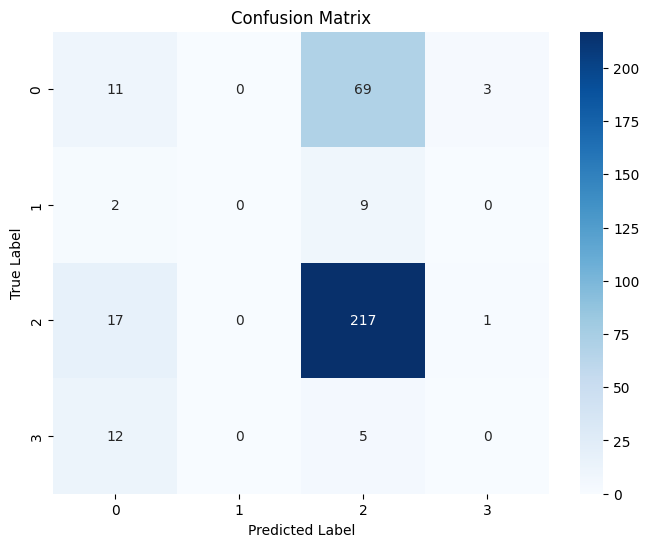

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
display(y_train.value_counts())

,count
class,
2.0,975
0.0,301
1.0,58
3.0,48


In [31]:
pip install imblearn

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy={0.0: 975, 1.0: 975, 2.0: 975, 3.0: 975})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
display(y_train_resampled.value_counts())

,count
class,
2.0,975
0.0,975
3.0,975
1.0,975


In [54]:
model_resampled = XGBClassifier()
model_resampled.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
y_pred_resampled = model_resampled.predict(X_test)

cm_resampled = confusion_matrix(y_test, y_pred_resampled)
display(cm_resampled)

accuracy_resampled = model_resampled.score(X_test, y_test)
print(f"Accuracy on the test set after oversampling: {accuracy_resampled}")

array([[ 75,   7,   0,   1],
       [  0,  11,   0,   0],
       [  0,   0, 235,   0],
       [  1,   1,   0,  15]])

Accuracy on the test set after oversampling: 0.9710982658959537


In [56]:
X_one_hot_encoded = pd.get_dummies(X)
display(X_one_hot_encoded.head())

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [57]:
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_one_hot_encoded, y_encoded_df, test_size=0.2, random_state=42)

In [58]:
model_ohe = XGBClassifier() # Increased max_iter for convergence
model_ohe.fit(X_train_ohe, y_train_ohe)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
y_pred_ohe = model_ohe.predict(X_test_ohe)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_ohe = confusion_matrix(y_test_ohe, y_pred_ohe)
display(cm_ohe)

accuracy_ohe = accuracy_score(y_test_ohe, y_pred_ohe)
print(f"Accuracy on the test set with one-hot encoding: {accuracy_ohe}")

array([[ 76,   7,   0,   0],
       [  0,  11,   0,   0],
       [  0,   0, 235,   0],
       [  0,   0,   0,  17]])

Accuracy on the test set with one-hot encoding: 0.9797687861271677


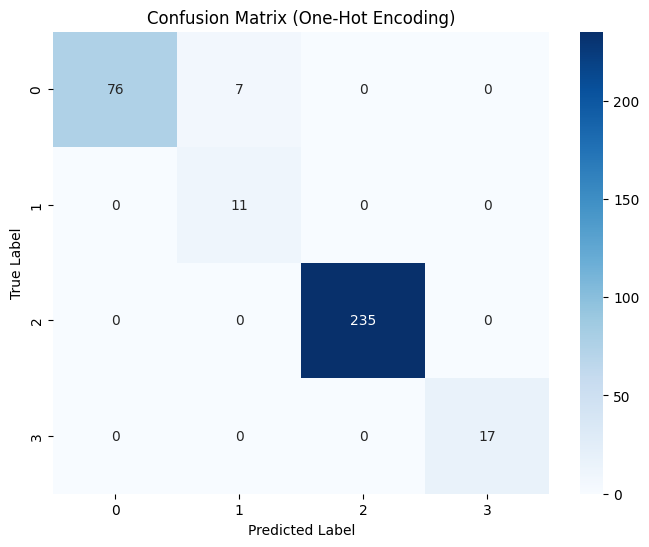

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ohe, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (One-Hot Encoding)')
plt.show()

In [62]:
data = {
    'buying': ['vhigh', 'low', 'med'],
    'maint': ['vhigh', 'med', 'low'],
    'doors': ['2', '4', '5more'],
    'persons': ['2', 'more', '2'],
    'lug_boot': ['small', 'big', 'med'],
    'safety': ['low', 'high', 'med']
}

df2 = pd.DataFrame(data)
display(df2)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,low,med,4,more,big,high
2,med,low,5more,2,med,med


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [48]:
from sklearn.compose import ColumnTransformer

categorical_features = X.columns.tolist()
one_hot = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features)
    ],
    remainder='passthrough'
)

In [64]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier())])

In [66]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['buying', 'maint', 'doors',
                                                   'persons', 'lug_boot',
                                                   'safety'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               earl...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [67]:
y_pred_pipeline = model_pipeline.predict(X_test)

cm_pipeline = confusion_matrix(y_test, y_pred_pipeline)
display(cm_pipeline)

accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print(f"Accuracy on the test set with the pipeline: {accuracy_pipeline}")

array([[ 76,   7,   0,   0],
       [  0,  11,   0,   0],
       [  0,   0, 235,   0],
       [  0,   0,   0,  17]])

Accuracy on the test set with the pipeline: 0.9797687861271677


In [68]:
df2_predictions = model_pipeline.predict(df2)
display(df2_predictions)

array([2, 2, 2])